In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import Functions
from pyecharts import options as opts
from pyecharts.options import ComponentTitleOpts
from pyecharts.charts import Pie
from pyecharts.components import Table
import seaborn as sns  
import numpy as np
sns.set_style('whitegrid') 


In [3]:
with gzip.open('cleaned_data.zip','rb') as file:
    feature_data = pd.read_csv(file,index_col=[0,1])

with gzip.open('new_label_data.zip','rb') as file:
    new_label_data = pd.read_csv(file,index_col=[0,1])

data = pd.concat([feature_data,new_label_data],join='inner',ignore_index=False,axis=1)

In [4]:
new_label_pair = data.iloc[:,-1].value_counts().index
new_label_count = data.iloc[:,-1].value_counts().values

new_label_dict = {0:'Sleep', 1:'Efficiency', 2:'Exercise', 3:'Life_activity', 4:'Entertainment', 5:'On_the_way', 6:'Normal'}
new_label_pair = [new_label_dict.get(i) for i in new_label_pair]
print(new_label_count)

[76307 76282 59461 37162 21197 11255  9891]


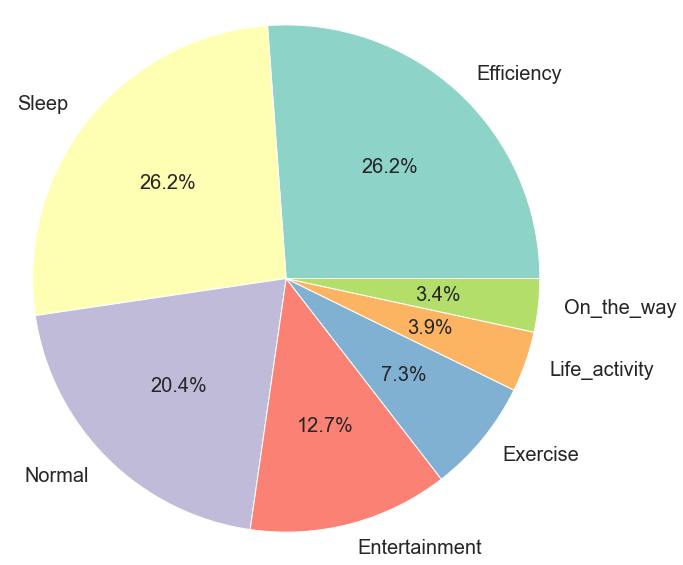

In [63]:
plt.figure(figsize=(10,10))
plt.pie(new_label_count,labels = new_label_pair, autopct = '%.1f%%')
plt.rcParams.update({"font.size":20})
plt.axis('equal')
plt.show()


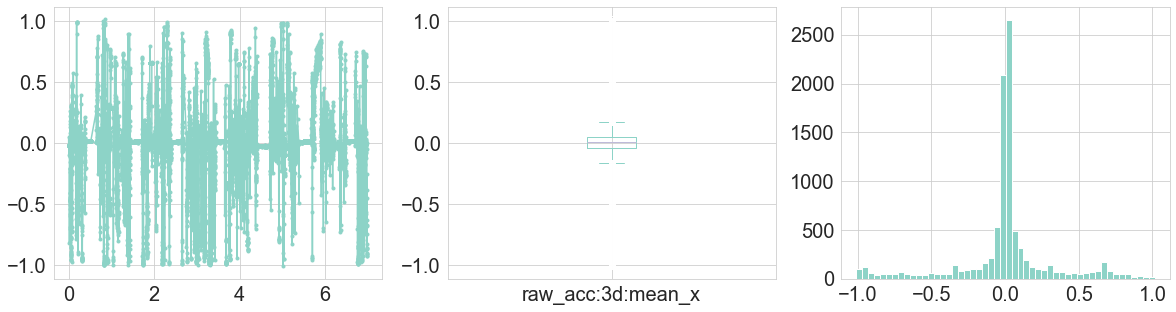

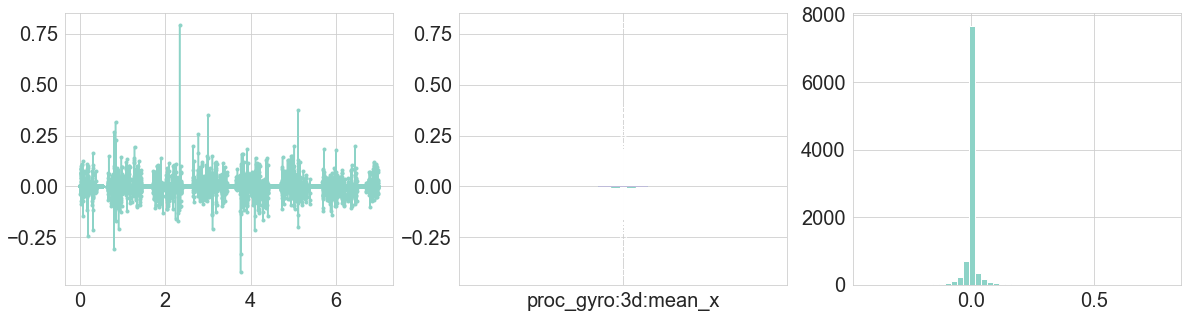

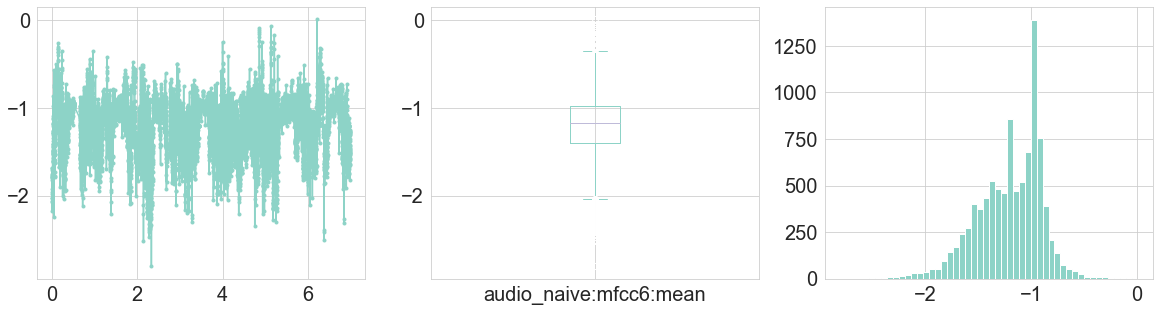

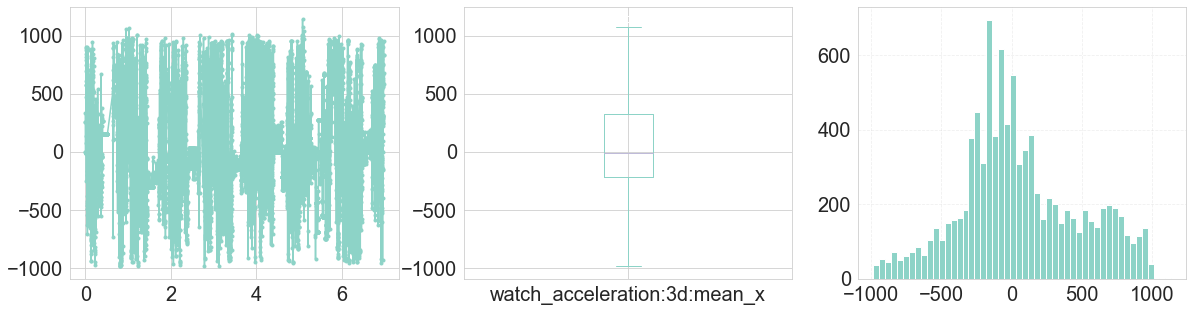

In [118]:
uuid = data.groupby('uuid').count().index[36]
timestamps = data.loc[uuid].index.values
values = data.loc[uuid].iloc[:,:-1]
daytimes = []
for time in timestamps:
    daytimes.append((time - timestamps[0])/float(60*60*24))

feature_number = len(values.columns)
feature_list = [1,5,18,47]
for i in feature_list:
    feature_value = values[values.columns[i]]
    fig = plt.figure(figsize=(20,5))
    ax1 = plt.subplot(1,3,1)
    ax1.plot(daytimes,feature_value,'.-')
    ax2 = plt.subplot(1,3,2)
    feature_value.plot.box()
    ax3 = plt.subplot(1,3,3)
    ax3.hist(feature_value,bins = 50)
plt.grid(linestyle = "--", alpha=0.3)

plt.show()
#print(values.describe())


In [110]:
(data.index[1000][1] - data.index[0][1]) / float(60*60*24)


1.0266203703703705

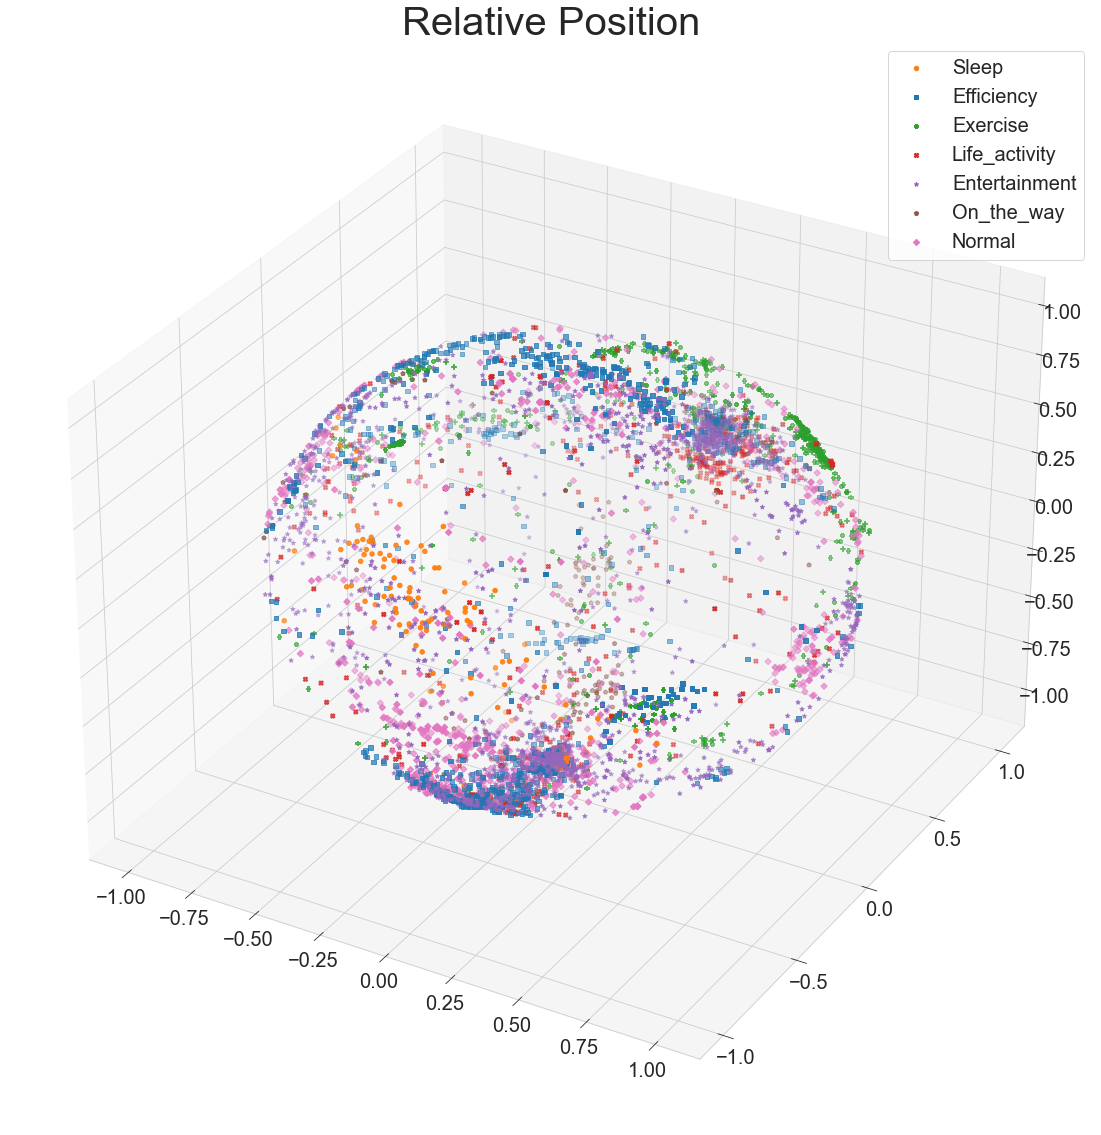

In [147]:
from mpl_toolkits.mplot3d import Axes3D
uuid_data = data.loc[uuid]
acc = uuid_data.iloc[:,1:4]
label = uuid_data.iloc[:,-1]
label_type = uuid_data.iloc[:,-1].value_counts().index


new_label_dict = {0:'Sleep', 1:'Efficiency', 2:'Exercise', 3:'Life_activity', 4:'Entertainment', 5:'On_the_way', 6:'Normal'}


fig = plt.figure(figsize=(20,20))
colors = ['#ff7f0e','#1f77b4',  '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
markers = ['o','s','P','X','*','p','D']
fig = plt.axes(projection='3d')
for i in range(7):
    index = label[label.values == i].index
    fig.scatter(acc.loc[index].iloc[:,0],acc.loc[index].iloc[:,1],acc.loc[index].iloc[:,2],label=new_label_dict[i],marker=markers[i],c=colors[i])
plt.rcParams.update({"font.size":20})
plt.legend()
plt.title('Relative Position',fontsize=40)

plt.show()

In [54]:
def get_sum_list(slice_df):
    to_list = list(slice_df)
    for i in range(len(to_list)):
        to_list[0] = 0
        to_list[i] = to_list[i-1] + to_list[i]
    return to_list



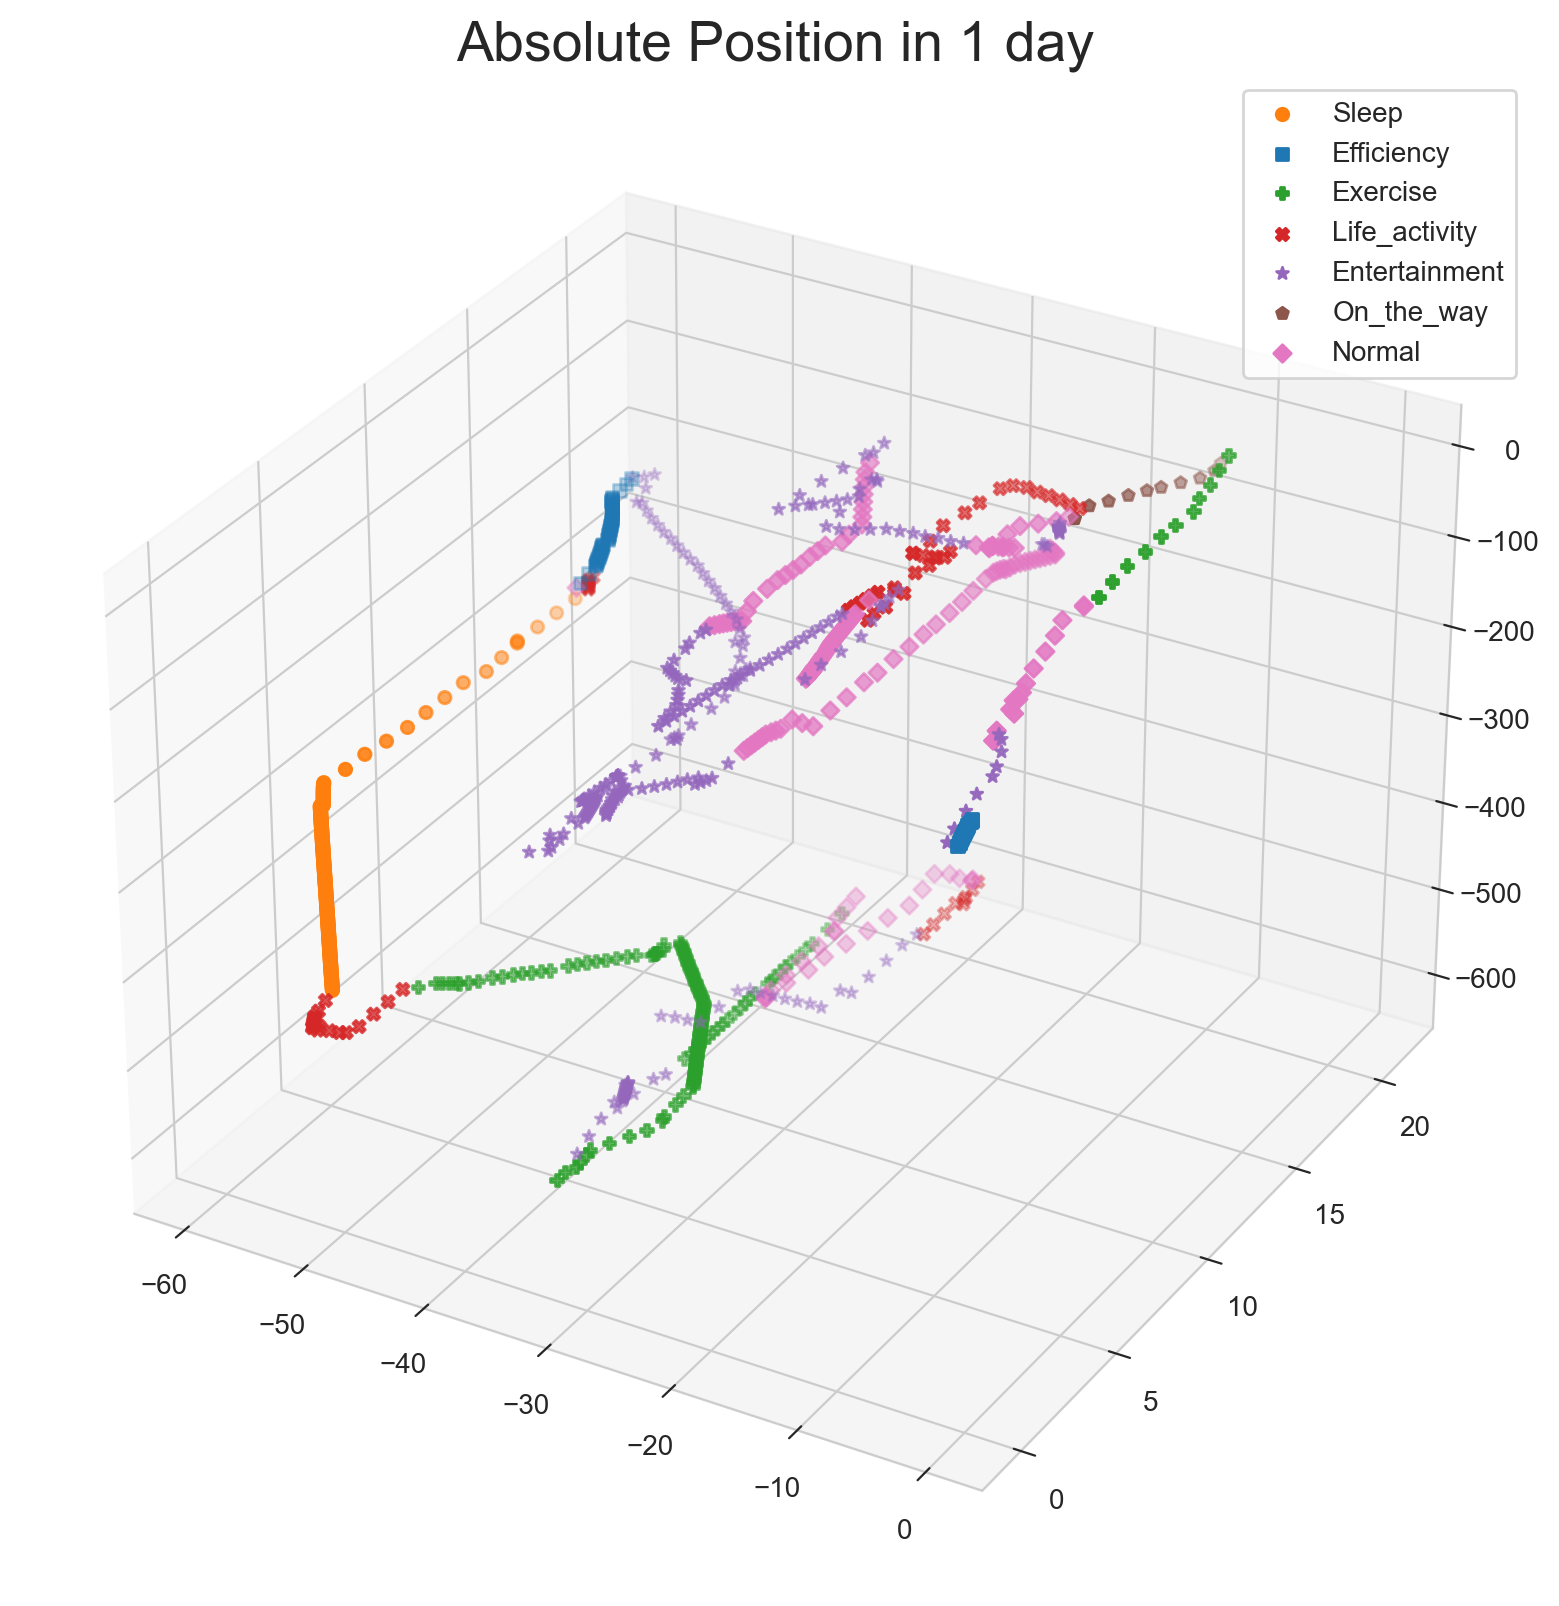

In [149]:
uuid_data = data.loc[uuid].iloc[:1000,:]
acc = uuid_data.iloc[:,1:4]
label = uuid_data.iloc[:,-1]
label_type = uuid_data.iloc[:,-1].value_counts().index


for i in range(3):
    acc.iloc[:,i] = get_sum_list(acc.iloc[:,i])

new_label_dict = {0:'Sleep', 1:'Efficiency', 2:'Exercise', 3:'Life_activity', 4:'Entertainment', 5:'On_the_way', 6:'Normal'}
label = uuid_data.iloc[:,-1]
label_type = uuid_data.iloc[:,-1].value_counts().index

fig = plt.figure(figsize=(10,10),dpi=200)

colors = ['#ff7f0e','#1f77b4',  '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
markers = ['o','s','P','X','*','p','D']
ax2 = plt.axes(projection='3d')
for i in range(7):
    index = label[label.values == i].index
    ax2.scatter(acc.loc[index].iloc[:,0],acc.loc[index].iloc[:,1],acc.loc[index].iloc[:,2],c = colors[i],label=new_label_dict[i],marker=markers[i])
plt.rcParams.update({"font.size":10})
plt.legend(fontsize=10)
plt.title('Absolute Position in 1 day',fontsize=20)
plt.show()

In [107]:
uuid_data.iloc[:,1:4]

,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z
timestamps,,,
1448922048,0.052345,-0.695469,-0.740527
1448922109,-0.022819,-0.002664,-1.015475
1448922169,-0.022437,-0.001650,-1.014904
1448922465,-0.025713,-0.002951,-1.017365
1448922526,-0.095747,-0.024795,-0.957153
...,...,...,...
1448993066,-0.055426,-0.955593,-0.294910
1448993126,-0.109848,-0.897357,-0.241337
1448993186,-0.988996,-0.071240,-0.143931
